# Foundations of Data Mining: Fashion-MNIST Challenge

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

**Name:** Koen Klaren

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 200 # This controls the size of your figures
plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all" 

import sklearn.decomposition as deco
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix

## Fashion-MNIST
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [3]:
fmnist_data = oml.datasets.get_dataset(40996) # Download MNIST data
# Get the predictors X and the labels y
X, y = fmnist_data.get_data(target=fmnist_data.default_target_attribute); 

In [4]:
# build a list of figures for plotting
def buildFigureList(fig, subfiglist, titles, length):
    for i in range(0,length):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(1,length,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.set_title(titles[i])
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

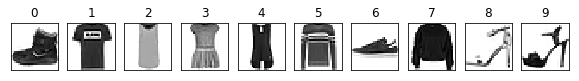

In [5]:
subfiglist = []
titles=[]

for i in range(0,10):
    subfiglist.append(X[i])
    titles.append(i)

buildFigureList(plt.figure(1, figsize=(10, 2)),subfiglist, titles, 10)
plt.show()

### a)  Analyze the main components of a class (6 points)

Write a piece of code that takes a set of 28x28 images as input and does the following:

- Compute and show the mean and the first two principle components as 
images
- Make a 2-dimensional scatter plot of the transformed data 
- Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
- Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

Apply your code to the class 0 (T-shirt/top) of Fashion MNIST. Answer the following questions:

- What aspect(s) of the data does the first component capture? 
- What aspect(s) of the data does the second component capture? 


In [156]:
from sklearn.decomposition import PCA

def pca_analysis(X, y):
    subfiglist = []
    titles=[]

    # Compute the mean
    mean = np.mean(X_a, axis=0)
    subfiglist.append(mean)
    titles.append('mean')
    
    # Compute the first two principal components
    pca = PCA(n_components=2)
    pca.fit(X_a)

    for i, pc in enumerate(pca.components_):
        subfiglist.append(pc)
        titles.append('pc {}'.format(i + 1))
    
    # Show the images
    fig = plt.figure(figsize=(10, 2))
    buildFigureList(fig, subfiglist, titles, 3)
    plt.show()
    
    
    # Make a 2-dimensional scatter plot of the transformed data
    X_pca = pca.transform(X_a)

    plt.figure(figsize=(8, 8))

    plt.title('Transformed data')
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.show()
    
    
    # Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
    pc1, pc2 = pca.components_

    # Create ranges
    size = 7

    min1 = np.min(X_pca[:,0])
    max1 = np.max(X_pca[:,0])

    min2 = np.min(X_pca[:,1])
    max2 = np.max(X_pca[:,1])

    l1space, l1step = np.linspace(min1, max1, size, retstep=True)
    l2space, l2step = np.linspace(min2, max2, size, retstep=True)
    l2space = np.flip(l2space, axis=0)

    # Show plot
    fig = plt.figure(1, figsize=(8, 8))

    i = 0

    for l2 in np.linspace(max2, min2, size):
        for l1 in np.linspace(min1, max1, size):
            i += 1
            pixels = mean + l1 * pc1 + l2 * pc2
            pixels = pixels.reshape((28, 28))
            plt.subplot(size, size, i)
            imgplot = plt.imshow(pixels, cmap='gray_r')
            a = plt.gca()
            a.axes.get_xaxis().set_visible(False)
            a.axes.get_yaxis().set_visible(False)
            
    fig.suptitle('Component samples')
    plt.show()
    
    # Compute and show a sample of input images along each of the two main axes as images (as in the lecture)
    fig = plt.figure(1, figsize=(8, 8))

    i = 0

    for l2 in l2space:
        for l1 in l1space:
            i += 1

            [indices] = np.where(
                (X_pca[:,0] >= l1) & 
                (X_pca[:,0] < l1 + l1step) & 
                (X_pca[:,1] >= l2) & 
                (X_pca[:,1] < l2 + l2step)
            )

            if indices.size == 0:
                continue

            index = np.random.choice(indices)
            pixels = X_a[index]
            pixels = pixels.reshape((28, 28))

            plt.subplot(size, size, i)
            imgplot = plt.imshow(pixels, cmap='gray_r')
            a = plt.gca()
            a.axes.get_xaxis().set_visible(False)
            a.axes.get_yaxis().set_visible(False)
    
    fig.suptitle('Input samples')
    plt.show()

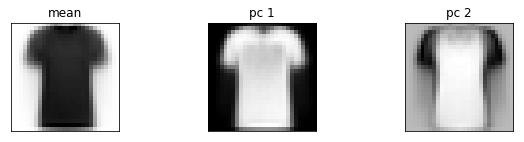

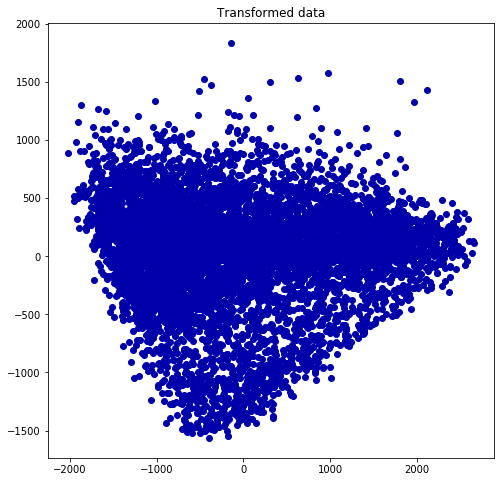

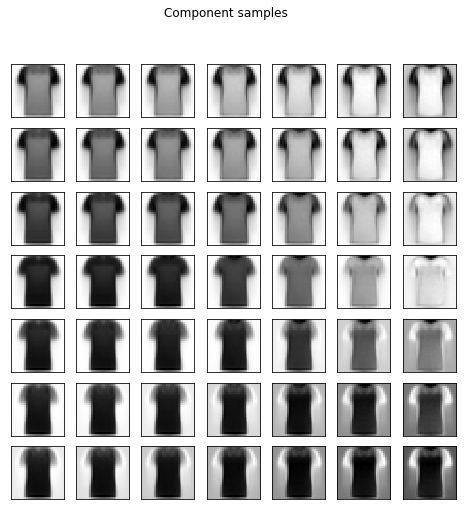

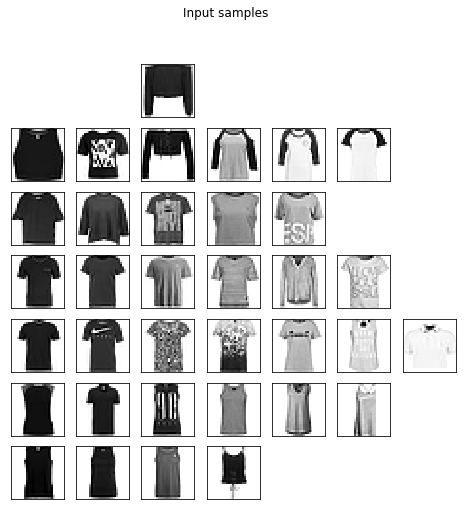

In [157]:
indices = y == 0
X_a = X[indices]
y_a = y[indices]

pca_analysis(X_a, y_a)

#### Analysis:

- The first component captures the color of the piece of clothing. As can be seen in the images above, the more to the right the lighter the pieces of clothing are.
- The second component captures the contrast between sleeve (-area) and body of the shirts. The lower images are therefore more likely to be tops.

### b) Analyze two classes together and separately (2 points)

Apply the same analysis as in a) to the following subsets of data points:

- images in the union of class 2 and 4 (Pullover and Coat). In the scatter plot, indicate the two classes by color. 
- images in class 2 (Pullover). 
- images in class 4 (Coat). 

Compare the three analyses.  

#### Analysis:




### c) Analyze a cluster computed by k-means (2 Points)

Run k-means on Fashion MNIST with k=10 using k-means++ and random_state=0. 

Compute and show a confusion matrix of the clusters with respect to the original labels. 

Choose a cluster where more than one class is predominant.
Apply the same analysis as in a) to the components of the chosen cluster. In the scatter plot, indicate the original class labels with color.

#### Analysis:

